In [229]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

In [314]:
orders = pd.read_csv('data/Orders.csv')

In [315]:
orders.describe()

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [316]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [317]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'], format='%m/%d/%y')

In [318]:
orders.Sales = orders.Sales.str.replace('$','')
orders.Sales =orders.Sales.str.replace(',','')
orders['Sales'] = orders['Sales'].astype(float)




orders.Profit = orders.Profit.str.replace('$','')
orders.Profit =orders.Profit.str.replace(',','')
orders.Profit = orders.Profit.astype(float)


<ipython-input-318-bfadaf426762>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-318-bfadaf426762>:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [319]:
import plotly.express as px 
# . Is there any seasonal trend of inventory in the company?
#     2. Is the seasonal trend the same for different categories?
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,2014-05-06,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium


In [320]:
orders['Month'] = orders['Order.Date'].dt.month
orders['Year'] = orders['Order.Date'].dt.year

In [321]:
seasondf = orders.groupby('Month').sum().reset_index()
px.histogram(seasondf, x= 'Month', y='Quantity', nbins = 20)

In [322]:
season2=orders.groupby(['Month','Category']).sum().reset_index()
px.bar(season2, x = 'Month',y = 'Quantity',facet_col="Category")

In [323]:
returns = pd.read_csv('data/Returns.csv')

In [324]:
combined = orders.merge(returns, left_on = 'Order.ID',right_on = 'Order ID', how = 'left')
combined = combined.drop('Order ID', axis =1)



In [325]:
combined['Returned']=combined.Returned.fillna('No')

In [326]:
# P3 Q1
combined.groupby(['Year', 'Returned'])['Profit'].sum()

Year  Returned
2012  No          231463.09
      Yes          17477.26
2013  No          298145.44
      Yes           9269.89
2014  No          389424.26
      Yes          17510.63
2015  No          487053.13
      Yes          17112.97
Name: Profit, dtype: float64

In [327]:
## P3 Q2
(combined[combined['Returned'] == 'Yes']['Customer.ID'].value_counts()>5).sum()

46

In [328]:
returns.groupby('Region')['Returned'].count().sort_values(ascending = False)

Region
Western Europe       121
Central America      117
Oceania               78
Western US            72
Eastern US            69
Southeastern Asia     64
South America         61
Southern Asia         58
Southern Europe       55
Eastern Asia          53
Western Asia          50
Southern US           44
Northern Europe       43
Central US            42
Caribbean             31
Western Africa        29
North Africa          26
Eastern Europe        24
Eastern Africa        11
Southern Africa       11
Central Africa        10
Eastern Canada         5
Central Asia           4
Western Canada         1
Name: Returned, dtype: int64

<AxesSubplot:xlabel='Category,Returned'>

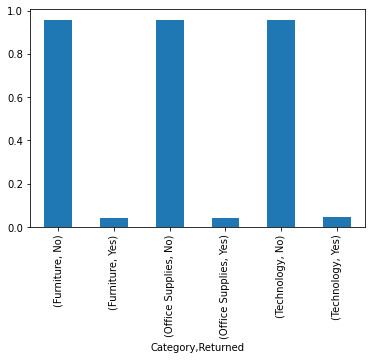

In [329]:
combined.groupby('Category')['Returned'].value_counts()
supplyseries = combined.groupby('Category')['Returned'].value_counts()/combined.groupby('Category')['Returned'].size() 
supplyseries.plot(kind='bar')

<AxesSubplot:xlabel='Sub.Category,Returned'>

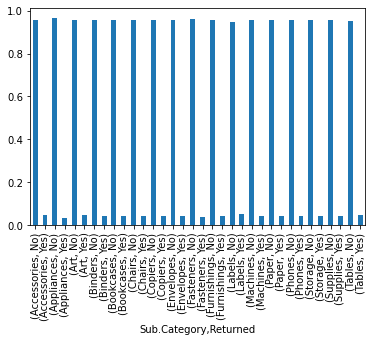

In [330]:
# p3 , Q4 
subseries = combined.groupby('Sub.Category')['Returned'].value_counts()/ combined.groupby('Sub.Category').size()
subseries.plot(kind = 'bar')


In [331]:
# part two q1
combined.Returned = combined.Returned.map({'Yes': 1, 'No': 0})

In [332]:
# part two q 2
combined['Order.Date'] = pd.to_datetime(orders['Order.Date'], format='%m/%d/%y')
combined['Ship.Date'] = pd.to_datetime(orders['Ship.Date'], format='%m/%d/%y')
combined['Process.Time'] = combined['Ship.Date'] - combined['Order.Date']
combined

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Returned,Region_y,Process.Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.770,High,11,2014,0,NaN,2 days
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.630,Critical,2,2014,0,NaN,2 days
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.97,915.490,Medium,10,2014,0,NaN,1 days
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.54,910.160,Medium,1,2014,0,NaN,2 days
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.52,903.040,Critical,11,2014,0,NaN,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,5,0.0,4.50,1.010,Medium,6,2015,0,NaN,0 days
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,5,0.2,3.34,1.930,High,5,2014,0,NaN,4 days
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,2,0.0,2.48,1.580,High,8,2012,0,NaN,5 days
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,2,0.0,2.40,1.003,Medium,2,2013,0,NaN,4 days


In [333]:
# part two q 3 
a = combined[combined['Returned']=='Yes'].groupby('Product.ID').sum()[['Quantity']]
a

,Quantity
Product.ID,


In [334]:
combined = combined.drop(['Region_y','Postal.Code'],axis =1 )

In [335]:
combined['N_Returns'] = combined[combined['Returned']==1].groupby('Product.ID').sum()[['Quantity']]

In [336]:
combined["N_Returns"] = combined["N_Returns"].fillna(0)

In [337]:
combined
Y = combined['Returned']
X = combined[['Year','Month','Ship.Mode','Region_x','Segment','Sales','Quantity','Discount','Profit','Shipping.Cost','Order.Priority','Process.Time','N_Returns','Category','Sub.Category']]


In [339]:
# X.loc['Process.Time'] = (X['Process.Time']).astype('timedelta64[D]')
X['Process.Time'] = pd.to_timedelta(X['Process.Time']).dt.days
X = X.drop('Profit',axis =1)

X
# combined['Process.Time'] = (combined['Process.Time']).astype('timedelta64[D]').astype('int')

KeyError: "['Profit'] not found in axis"

In [340]:
combine_dummy = pd.get_dummies(data=X, columns=[
    'Category', 'Sub.Category','Ship.Mode','Region_x','Segment','Order.Priority'
],drop_first = True)

combine_dummy.columns

Index(['Year', 'Month', 'Sales', 'Quantity', 'Discount', 'Shipping.Cost',
       'Process.Time', 'N_Returns', 'Category_Office Supplies',
       'Category_Technology', 'Sub.Category_Appliances', 'Sub.Category_Art',
       'Sub.Category_Binders', 'Sub.Category_Bookcases', 'Sub.Category_Chairs',
       'Sub.Category_Copiers', 'Sub.Category_Envelopes',
       'Sub.Category_Fasteners', 'Sub.Category_Furnishings',
       'Sub.Category_Labels', 'Sub.Category_Machines', 'Sub.Category_Paper',
       'Sub.Category_Phones', 'Sub.Category_Storage', 'Sub.Category_Supplies',
       'Sub.Category_Tables', 'Ship.Mode_Same Day', 'Ship.Mode_Second Class',
       'Ship.Mode_Standard Class', 'Region_x_Caribbean',
       'Region_x_Central Africa', 'Region_x_Central America',
       'Region_x_Central Asia', 'Region_x_Central US',
       'Region_x_Eastern Africa', 'Region_x_Eastern Asia',
       'Region_x_Eastern Europe', 'Region_x_Eastern US',
       'Region_x_North Africa', 'Region_x_Northern Europe', 'Re

In [365]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(combine_dummy,Y, test_size=0.2, random_state=42,stratify=Y)


In [366]:
from sklearn import linear_model 
logit = linear_model.LogisticRegression(solver='liblinear',class_weight='balanced')
logit.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [368]:
logit.intercept_
logit.score(X_test,Y_test)

0.52349385845194

In [369]:
logit.coef_

array([[-4.62743971e-05,  1.60863013e-02, -2.75368069e-04,
        -1.42180906e-02,  2.70418459e-01,  1.29600448e-03,
         0.00000000e+00,  0.00000000e+00, -2.57131160e-03,
         4.39451557e-03, -1.15285699e-01,  2.16285755e-02,
         3.38984930e-02, -1.39151995e-02,  3.38915205e-02,
         3.29044515e-02, -1.02798831e-03, -1.31612834e-01,
         9.25372754e-03,  3.32610864e-01, -1.70313065e-02,
        -4.83103647e-02,  5.21825640e-02, -6.63519727e-03,
        -8.78371609e-02,  1.02635326e-02,  2.01967234e-01,
         6.80416598e-02,  2.17008304e-01, -7.19612768e-02,
        -4.19977701e-01,  7.41464764e-02,  1.24185582e-01,
        -3.10164239e-01, -6.59933147e-01,  3.10019546e-01,
        -3.72531437e-01,  1.28782676e-01,  7.14312438e-02,
        -2.25188309e-01,  7.25857226e-02,  2.98197725e-02,
         1.12223327e-02,  3.52107496e-01,  2.77820845e-02,
         1.80337645e-01,  1.19390105e-01, -1.91517068e-01,
        -4.34550392e-02, -4.73375673e-02,  2.90255363e-0

In [364]:
StratifiedKFold?

In [370]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for training_idx, validation_idx in skfold.split(X_train, Y_train):
    print("The churn rate of the training set of this fold is {}.".format(Y_train.iloc[training_idx].mean()))
    print("The churn rate of the validation set of this fold is {}.".format(Y_train.iloc[validation_idx].mean()))
    print("\n")

The churn rate of the training set of this fold is 0.04329017517136329.
The churn rate of the validation set of this fold is 0.04325575728037041.


The churn rate of the training set of this fold is 0.04325971058644326.
The churn rate of the validation set of this fold is 0.043377604483977095.


The churn rate of the training set of this fold is 0.043288856394321576.
The churn rate of the validation set of this fold is 0.0432610285157202.


The churn rate of the training set of this fold is 0.043288856394321576.
The churn rate of the validation set of this fold is 0.0432610285157202.


The churn rate of the training set of this fold is 0.043288856394321576.
The churn rate of the validation set of this fold is 0.0432610285157202.




In [371]:
from sklearn.model_selection import cross_val_score
result = {}
for C in [0.0001, 0.01, 1, 100, 10000, 1000000, 100000000]:
    logistic = linear_model.LogisticRegression(C=C, solver='liblinear',class_weight = 'balanced')
    result[C] = cross_val_score(logistic, X_train, Y_train, cv=skfold).mean()
    
result


{0.0001: 0.46541715621099566,
 0.01: 0.5300497447222388,
 1: 0.5233476080366412,
 100: 0.5227626909742582,
 10000: 0.5227139580322356,
 1000000: 0.5226408645586218,
 100000000: 0.5226652250902131}

In [372]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(Y_test, logit.predict(X_test))

array([[5144, 4670],
       [ 218,  226]], dtype=int64)